In [1]:
import json

with open('results.json') as f:
    results = json.load(f)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 20)
    fig.set_size_inches(30, 5)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        # image = image / 255.0
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id}")
    print()
    pair = results[concept_id]
    print(pair["concept"])
    plot_instances(pair["feature"])

Concept #0

[['blue', 0.4895781792518569], ['four', 0.35988818559704755], ['color', 0.17779882340452213], ['green', 0.15193093178596923], ['round', 0.10110321912339063], ['red', 0.09333410542003992], ['white', 0.07469218360447541], ['three', 0.07049208921266766], ['angle', 0.06171816908337963], ['shape', 0.04867394807720733]]


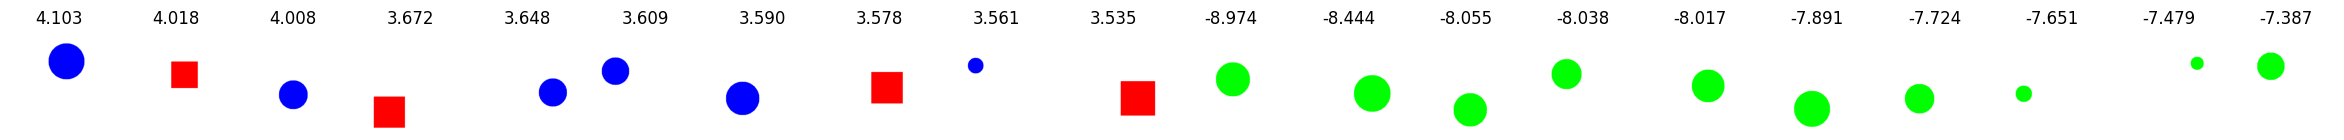

Concept #1

[['angle', 0.43385084058211104], ['shape', 0.14181366203842447], ['blue', 0.12839697802333327], ['left', 0.127450662768981], ['red', 0.1145405744452302], ['blank', 0.09233402017713552], ['up', 0.08422197975235346], ['bottom', 0.07357905479771469], ['white', 0.061960118719485625], ['position', 0.05982037172084902]]


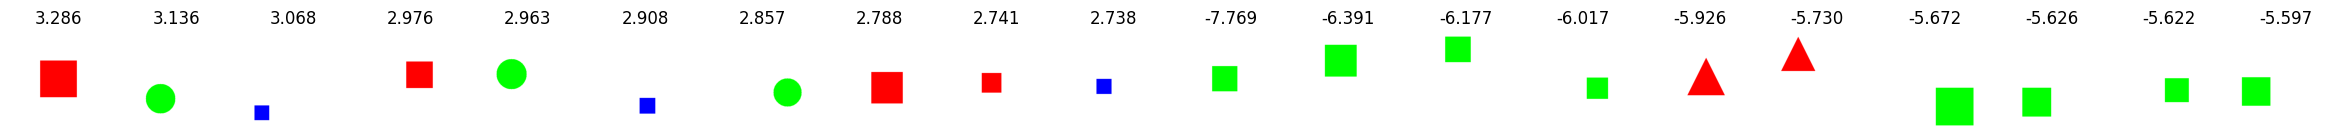

Concept #2

[['three', 0.46414045778716484], ['round', 0.16864131345012323], ['has', 0.1510000936202402], ['position', 0.1466523828101029], ['shape', 0.12913969417574606], ['is', 0.09586988125390154], ['unrotate', 0.07637195454615463], ['this', 0.07598855079714521], ['rotate', 0.05917262556793712], ['left', 0.05914925607125254]]


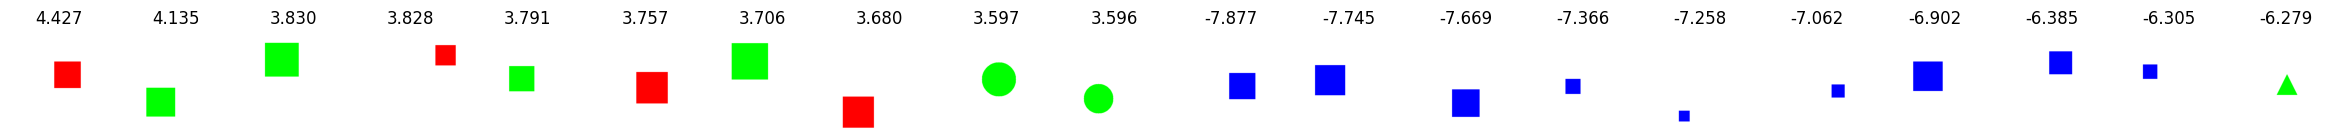

Concept #3

[['blank', 0.20864750934180928], ['white', 0.20351433242217962], ['canvas', 0.19082507493130882], ['blue', 0.17372910306463396], ['left', 0.13871882492297632], ['angle', 0.09763667492604837], ['this', 0.07941234418491361], ['right', 0.06772465925268475], ['bottom', 0.06056552441708214], ['color', 0.059078408139669476]]


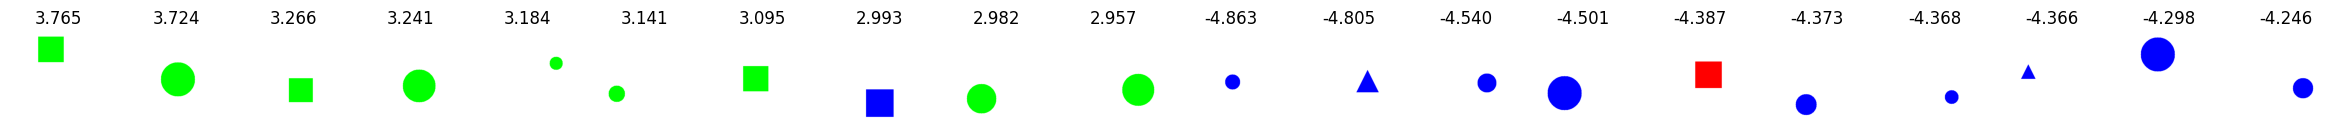

Concept #4

[['red', 0.7362514649949423], ['three', 0.5440793105984122], ['round', 0.3575603102765432], ['green', 0.16796365786131803], ['four', 0.14067483936868064], ['color', 0.10617685727674141], ['blue', 0.05132525409382533], ['is', 0.03900173029945633], ['white', 0.038253670554508665], ['unrotate', 0.035611085937379224]]


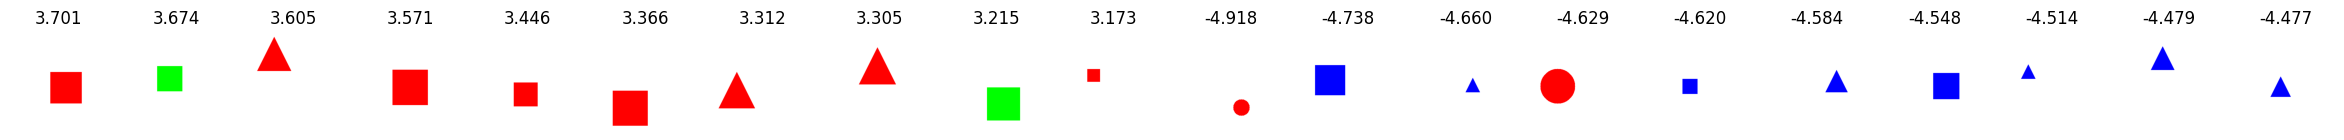

Concept #5

[['position', 0.5433203256388667], ['unrotate', 0.13472956174135398], ['blue', 0.11478143959510617], ['rotate', 0.09231690971172554], ['bottom', 0.0719302360632147], ['up', 0.0713459818881832], ['left', 0.06650270256325524], ['red', 0.04692592657193905], ['has', 0.04092971173425516], ['canvas', 0.03629045143148037]]


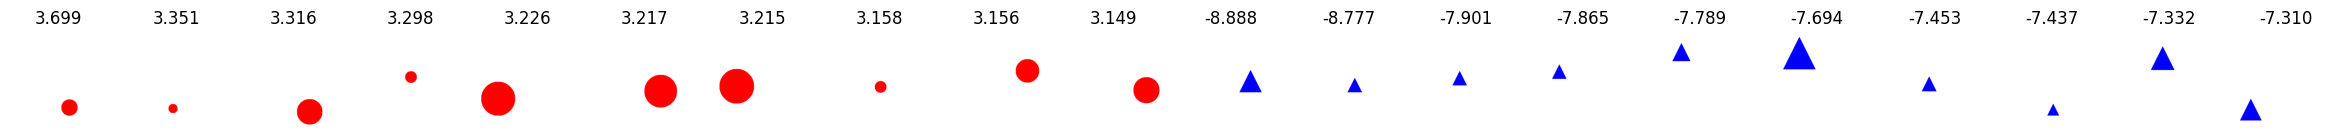

Concept #6

[['green', 0.38139765034846174], ['canvas', 0.20489190415072894], ['color', 0.1438767331967832], ['bottom', 0.1261030379088114], ['red', 0.10215266642531728], ['three', 0.10142376839630003], ['right', 0.08460236863395026], ['blue', 0.07283485480016325], ['white', 0.06737184789590155], ['this', 0.06711855705797187]]


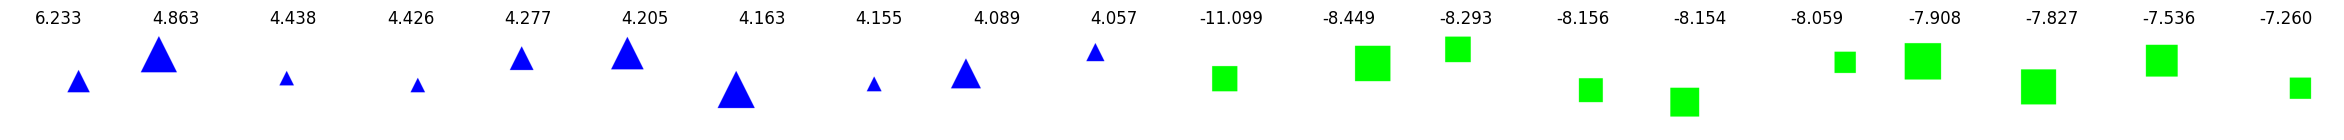

Concept #7

[['blue', 0.4997590253447614], ['three', 0.4192041612495252], ['red', 0.4124812553129424], ['color', 0.2774372560938765], ['four', 0.192711113999045], ['green', 0.09529135464406686], ['round', 0.07128831119072146], ['position', 0.041755536867956806], ['white', 0.03169630169658109], ['rotate', 0.026722291166135892]]


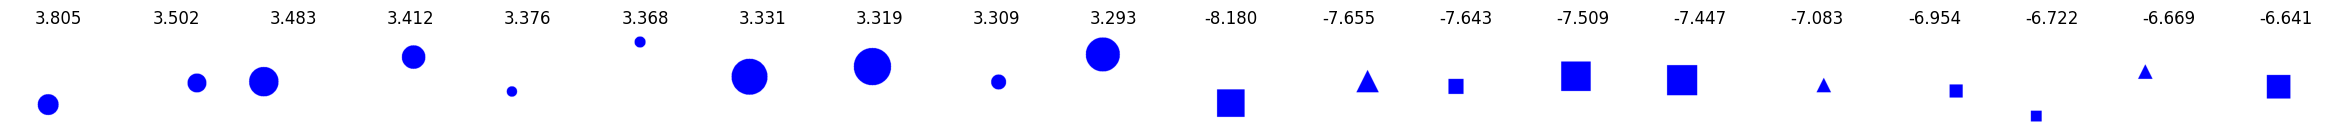

Concept #8

[['four', 0.5332600338187644], ['green', 0.35562297687297917], ['round', 0.27351725823510953], ['three', 0.25857036234886666], ['red', 0.12181746687104063], ['blue', 0.09549268350853184], ['angle', 0.07219638482220773], ['shape', 0.06970295026131115], ['canvas', 0.05668800453223833], ['unrotate', 0.05431461647770483]]


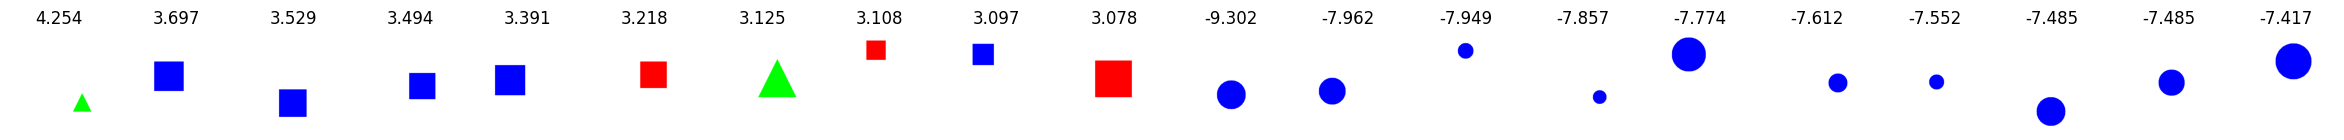

Concept #9

[['blue', 0.6553380518667097], ['green', 0.5351762638404602], ['three', 0.3054217334442992], ['color', 0.26345449363898615], ['red', 0.10699958029634705], ['round', 0.053446320795673664], ['is', 0.040485281551756507], ['left', 0.03363215233994662], ['four', 0.02886322951398608], ['white', 0.028224900030211626]]


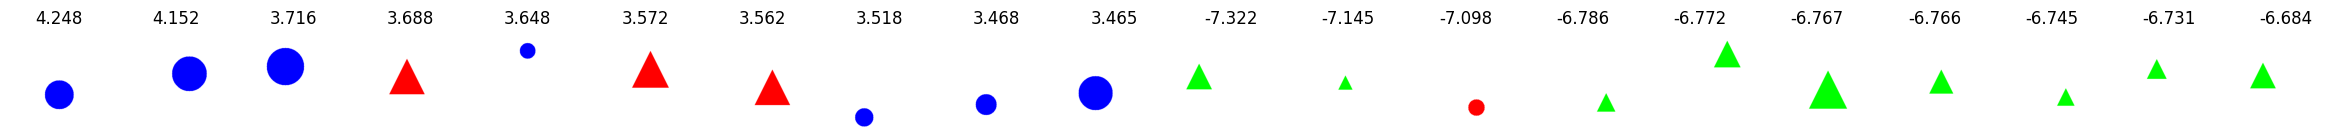

In [5]:
for i in range(10):
    visualize_concept(i)